In [14]:
import numpy as np
from numpy import sin, cos, pi, log10, log, sqrt, exp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [15]:
# Helper routine for doing the dot produc (criss-cross) and making plots
def criss_cross(y, lo, pts2plot = 100, bins2plot=32, make_plots = True, fs=1):
    """
    Multiply (dot-product) y with lo
    Plot outputs in time and freq domain
    pts2plot is the number of time-domain points to be plotted for readability
    """
    tt = np.array(range(len(y)))/fs

    # Multiply, that is, criss-cross the y input every f0 period
    y_x = y * lo

    if make_plots:
        # Plot two LO periods
        plt.figure(1); plt.subplot(1, 2, 1)
        plt.plot(tt[:pts2plot], y[:pts2plot], 'o-', label='y')
        plt.plot(tt[:pts2plot], lo[:pts2plot], 'o-', label='LO')
        plt.legend()
        plt.title('Multiplier Inputs')
        #plt.title('LO Freq [{}] = Input Freq [{}] / {}'.format(f0, ftest, DIV))

        plt.subplot(1, 2, 2)
        y_fft = np.fft.fft(y)/len(y)
        lo_fft = np.fft.fft(lo)/len(lo)
        #freq = np.arange(-fs/2, fs/2)
        #plt.plot(freq, np.abs(y_fft))
        plt.plot(20*log10(np.abs(y_fft)), 'o-', label='y')
        plt.plot(20*log10(np.abs(lo_fft)), 'o-', label='LO')
        plt.xlim(0, bins2plot) #-fs/20, fs/20)
        plt.ylim(-70, 0)
        plt.ylabel('20log|| Y(w) ||')
        #plt.title('Input Freq = {} Hz'.format(ftest))
        plt.title('FFT')
        plt.legend()

        plt.figure(2); plt.subplot(1, 2, 1)
        plt.plot(tt[:pts2plot], y[:pts2plot], ':', label='y')
        plt.plot(tt[:pts2plot], lo[:pts2plot], ':', label='LO')
        plt.plot(tt[:pts2plot], y_x[:pts2plot], 'o-', label='y .* LO')
        plt.legend()
        plt.title('Multiplier Output (after criss-crossing)')
        plt.xlabel('sample #')

        plt.subplot(1, 2, 2)
        y_x_fft = np.fft.fft(y_x)/len(y_x)
        #freq = np.arange(-fs/2, fs/2)
        #plt.plot(freq, np.abs(y_x_fft))
        plt.plot(20*log10(np.abs(y_fft)), 'o:', label = 'y')
        plt.plot(20*log10(np.abs(lo_fft)), 'o:', label = 'LO')
        plt.plot(20*log10(np.abs(y_x_fft)), 'o-', c='g', label = 'y .* LO')
        #plt.title('FFT after criss-crossing, LO = {} Hz'.format(f0))
        plt.xlim(0, bins2plot) #-fs/20, fs/20)
        plt.ylim(-70, 0)
        plt.xlabel('Frequency Bin')
        plt.ylabel('20log|| Y(w) ||')
        plt.legend()

    return y_x

Text(0.5, 1.0, 'DC tone seen')

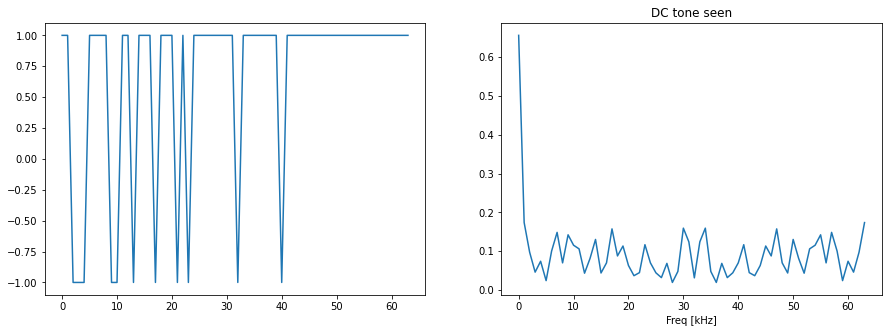

In [16]:
# First quadrant (64 bits)
s_p = np.ones(64)
s_p[2:5] = -1
s_p[9:11] = -1
s_p[13] = -1
s_p[17] = -1
s_p[21] = -1
s_p[23] = -1
s_p[32] = -1
s_p[40] = -1

plt.subplot(1,2,1)
plt.plot(s_p)

plt.subplot(1,2,2)
s_p_fft = np.fft.fftshift(np.fft.fft(s_p))/len(s_p)
#plt.plot(freq, s_p_fft)

s_p_fft = np.fft.fft(s_p)/len(s_p)
plt.plot(np.abs(s_p_fft))

plt.xlabel('Freq [kHz]')
plt.title('DC tone seen')

C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(y_fft)), 'o-', label='y')
C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(lo_fft)), 'o-', label='LO')
C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:48: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(y_fft)), 'o:', label = 'y')
C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(lo_fft)), 'o:', label = 'LO')
C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:50: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(y_x_fft)), 'o-', c='g', label = 'y .* LO')


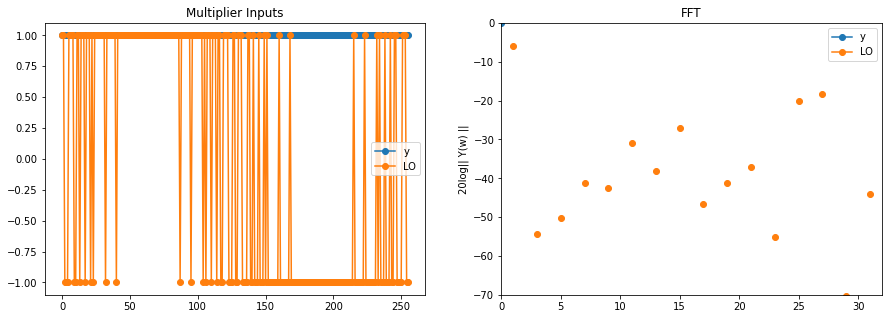

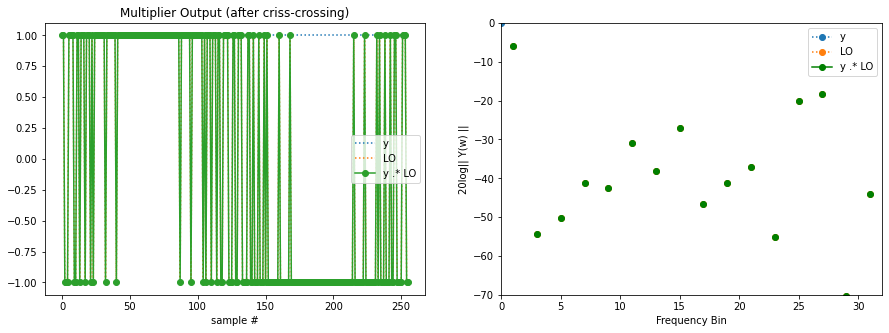

In [17]:
# All four quadrants (256 bits)
s_p_256 = []
s_p_256.extend(s_p)
s_p_256.extend(s_p[::-1])
s_p_256.extend(-s_p)
s_p_256.extend(-s_p[::-1])

ones = np.ones_like(s_p_256)

y_bin = criss_cross(ones, s_p_256, pts2plot=256)

C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(lo_fft)), 'o-', label='LO')
C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(lo_fft)), 'o:', label = 'LO')


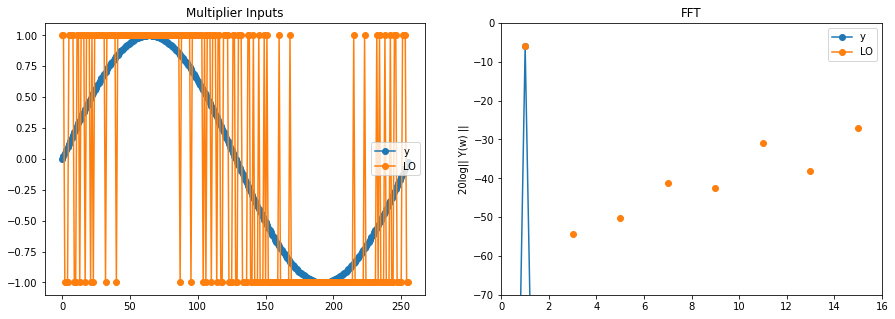

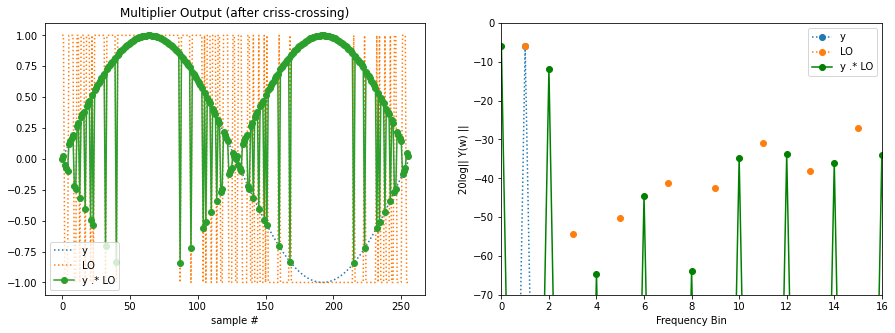

In [18]:
k = 1 # ratio of fund freqs, k=fund(lo)/fund(input)
tt = np.array(range(k*len(s_p_256)))
y = sin(2*pi/256/k*tt)

lo = []
for i in range(k): # repeat s' k times
    lo.extend(s_p_256)

y_x = criss_cross(y, lo, pts2plot=len(lo), bins2plot=k*16)

C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(lo_fft)), 'o-', label='LO')
C:\Users\ankur\AppData\Local\Temp\ipykernel_21152\581637274.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*log10(np.abs(lo_fft)), 'o:', label = 'LO')


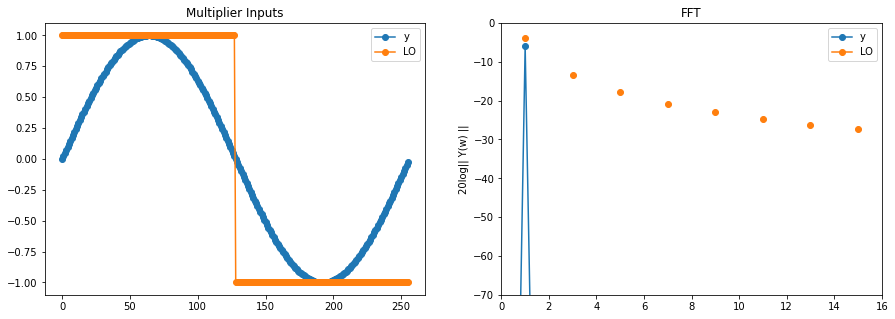

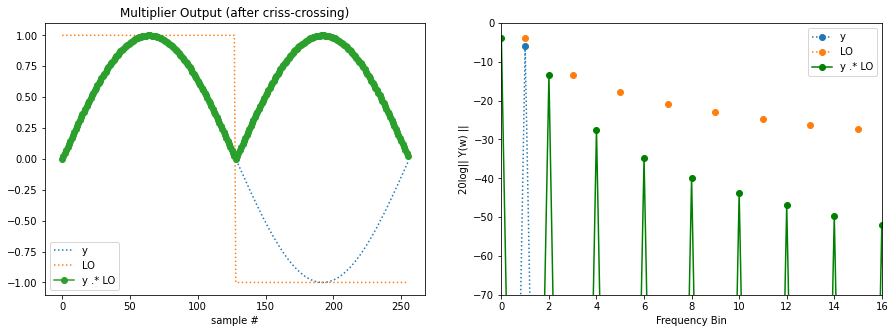

In [19]:
# Use square wave as LO
lo = np.ones_like(s_p_256) # start with an array of all 1s
lo[int(len(lo)/2):] = -1
y_sq = criss_cross(y, lo, pts2plot=len(lo), bins2plot=16)

In [76]:
class cap_array():
  def __init__(self, num_caps = 10, cap_ratio=1, unit_cap = 1):
    # array of num_caps, where each pair has cap ratio 1:K
    self.V = np.zeros(num_caps)
    self.C = np.ones(num_caps)*unit_cap
    self.C[1::2] *= cap_ratio # scale every other cap
    self.connect_phi1 = True # initial state of switches
    self.cap_ratio = cap_ratio
    print('caps values:', self.C)
    # lets say True => even connected, False => odd connected 

  def reset(self):
    self.V = np.zeros_like(self.q)

  def drive(self, Vin, cap_ndx = 0, print_out = True):
    # set cap_ndx's to plate to Vin
    self.V[cap_ndx] = Vin

    if print_out:
      print('V drive:', self.V)

  def switch(self, Vin, print_out = True):
    K = self.cap_ratio # c1/c0 = K

    # select even or odd switches
    if self.connect_phi1 == True:
      start_ndx = 1 # short in-cap0|cap1-cap2|cap3-cap4| ...
      self.drive(Vin, print_out = False)
    else: # connect phi2 switches
      start_ndx = 0 # short in|cap0-cap1|cap2-cap3|cap4- ...

    # connect all odd or even switches for charge-sharing 
    for i in range(start_ndx, len(self.C)-1, 2):
      q_total = self.C[i]*self.V[i] + self.C[i+1]*self.V[i+1]
      #print(self.C[i], self.V[i], self.C[i+1], self.V[i+1], q_total)
      
      # split the charge between the connected caps
      if start_ndx == 0: #ith cap is 1/K of (i+1)th cap
        q_i   = q_total/(K+1)
        q_ip1 = q_total/(K+1)*K
      else: #ith cap is K times the (i+1)th cap
        q_ip1 = q_total/(K+1)
        q_i   = q_total/(K+1)*K

      # convert Q back to V
      self.V[i] = q_i / self.C[i]
      self.V[i+1] = q_ip1 / self.C[i+1]
    
    if print_out:
      print('V switch:', self.V)

    # invert the switch state
    self.connect_phi1 = not self.connect_phi1

caps values: [ 1. 10.  1. 10.  1. 10.]
caps values: [ 1. 10.  1. 10.  1. 10.  1. 10.]
caps values: [ 1. 10.  1. 10.  1. 10.  1. 10.  1. 10.]
caps values: [ 1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.]


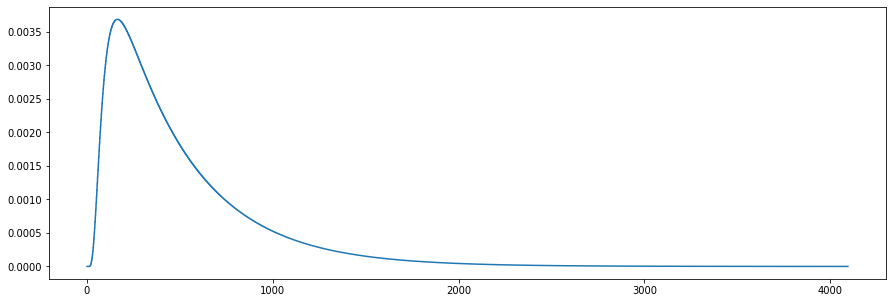

In [79]:
# input signal to switching-cap circuit
NUM_PERIODS = 16 #32*4
NUM_M_TICKS = 256*NUM_PERIODS

# Impulse input
cinput = np.zeros(NUM_M_TICKS)
cinput[0] = 1 #impulse
f_Hz = 1

'''
# Sine input
f_Hz = 1 # output of demod
MCLK_Hz = 256*f_Hz
MCLK_T_s = 1/MCLK_Hz
tt = np.arange(0, MCLK_T_s*NUM_M_TICKS, MCLK_T_s)
#cinput = 0.4 + 0.7*np.sin(2*pi*f_Hz*tt)
cinput = 0.6 
cinput += 0.1*np.sin(2*pi*f_Hz*tt)
cinput += 0.1*np.sin(2*pi*f_Hz/2*tt)
cinput += 0.1*np.sin(2*pi*f_Hz*2*tt)
cinput += 0.1*np.sin(2*pi*f_Hz*4*tt)
'''

#cinput = np.ones_like(y_x)
#cinput = y
#cinput = y_x

if 0: # FM input
  # Waveforms
  f0_Hz = 4
  fm_Hz = 1
  depth = 1
  carrier = sin(2*pi* f0_Hz *tt)
  data = sin(2*pi* fm_Hz *tt)
  f_dev_max = depth*f0_Hz # deviation in carrier freq
  fm_dev_ratio = f_dev_max/fm_Hz
  # https://www.electronics-notes.com/articles/radio/modulation/fm-frequency-modulation-index-deviation-ratio.php

  # Combining
  cinput = 0.6 + 0.6*sin(2*pi*f0_Hz*tt + fm_dev_ratio*data) # how does this work?

# Injection point
CAP_START = 0 #int(NUM_CAPS/2) # start from the middle cap

'''
sigma_f = 100
sigma = 1/(2*pi*sigma_f)
gain = 1/(sigma * sqrt(2*pi))
print('max amp = {:.2f}'.format(gain))
tt = np.array(range(len(cinput)))
g = gain * exp( -(tt**2) / (2*sigma**2) )
g_fft = np.fft.fft(g)/len(g)
ax2.plot(20*log10(np.abs(g_fft)), 'o:', label = 'input')
'''
VVout = {}
# Set sweep params
for NUM_CAPS in [6, 8, 10, 12]: # sweep #caps in array
  VVout[str(NUM_CAPS)] = {}

  for RATIO_F_BY_M_CLK in [1]: # sweep ratio of phi1/2 to mux clk
    VVout[str(NUM_CAPS)][str(RATIO_F_BY_M_CLK)] = {}

    for CAP_RATIO in [10]:
      VVout[str(NUM_CAPS)][str(RATIO_F_BY_M_CLK)][str(CAP_RATIO)] = {}

      #RATIO_PHI_BY_MASTER = 4
      NUM_PHI_TICKS = len(cinput)*RATIO_F_BY_M_CLK

      # Run simulation!
      caps = cap_array(num_caps = NUM_CAPS, cap_ratio = CAP_RATIO)

      out = []
      phi_ticks = 0
      n = 0 # indexing input sample
      for phi_ticks in range(NUM_PHI_TICKS):
        if phi_ticks % RATIO_F_BY_M_CLK == 0: # drive next sample
          if n < len(cinput): # samples still remain to be driven
            Vin = cinput[n]
          else: # inject 0s if input sequence finishes
            Vin = 0
          n += 1 # increment sample

        caps.switch(Vin, print_out=False)
        out.append(caps.V[-1]) # grab charge on last cap
        #plt.plot(caps.q, label = 'cycle ' + str(n))

      # grab final outputs
      VVout[str(NUM_CAPS)][str(RATIO_F_BY_M_CLK)][str(CAP_RATIO)]['time'] = out
      VVout[str(NUM_CAPS)][str(RATIO_F_BY_M_CLK)][str(CAP_RATIO)]['space'] = caps.V

# print(VVout)
plt.plot(out)

In [73]:
class capacitor_array:
    #Defining a capacitor class
    def __init__(self,Vin,C=1,alpha=10,n=16):
        self.n = n
        self.v_tops = np.zeros(n)
        self.capacitances = np.ones(n)*C
        self.capacitances[1::2] *= alpha
        self.v_tops[0] = Vin
        print(self.v_tops)
        print(self.capacitances)
    
    def forward_mean(self):
        for i in range(0,self.n,2):
            self.v_tops[i] = self.v_tops[i+1] = (self.v_tops[i] + self.v_tops[i+1])/2
            
    def backward_mean(self):
        for i in range(1,self.n-1,2):
            self.v_tops[i] = self.v_tops[i+1] = (self.v_tops[i] + self.v_tops[i+1])/2
        
    def switch(self, times, last_cap):
        for i in range(times):
            self.forward_mean()
            self.backward_mean()
            self.drain_node0()
            last_cap.append(self.v_tops[15])
        print(self.v_tops)
    
    def drain_node0(self):
        self.v_tops[0] = 0
            

In [64]:
ob = capacitor_array(1.2)

[1.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[ 1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.]


In [65]:
last_cap=[]
ob.switch(2000, last_cap)

[0.00000000e+00 1.18722774e-11 1.18722774e-11 2.32883098e-11
 2.32883098e-11 3.38093855e-11 3.38093855e-11 4.30311855e-11
 4.30311855e-11 5.05993212e-11 5.05993212e-11 5.62229533e-11
 5.62229533e-11 5.96859689e-11 5.96859689e-11 6.08552861e-11]


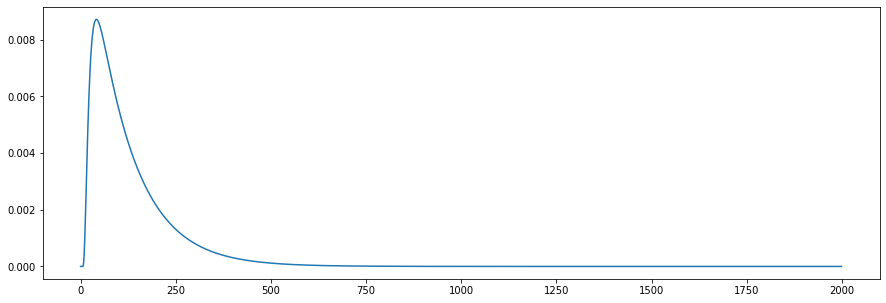

In [66]:
plt.plot(last_cap)

In [18]:
import math
fm = 2.56e6
fc = 3000
q = 6
oversample = 64
cap_ratio = (q*oversample)

In [19]:
cap_ratio

384

In [20]:
cs1 = 2e-15
cs2 = 10e-15
cs3 = 50e-15

In [21]:
cb1 = cap_ratio*cs1
cb2 = cap_ratio*cs2
cb3 = cap_ratio*cs3

In [22]:
r1 = 1/(fm*cs1)
r2 = 1/(fm*cs2)
r3 = 1/(fm*cs3)

In [23]:
print(r1/1000000, r2/1000000, r3/1000000, cb1*1e12, cb2*1e12, cb3*1e12)

195.31249999999997 39.0625 7.812499999999999 0.768 3.84 19.200000000000003


In [24]:
ctest = 100e-15
rtest = 1/(ctest*fc)

In [25]:
rtest/1000000

3333.3333333333335

In [26]:
! pip install lcapy

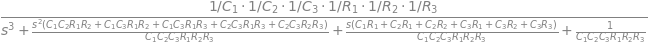

In [78]:
from lcapy import Circuit
afull = Circuit("""
.param k=1
P1 1 0; v=v_i(t)
R1 1 2;
C1 2 0;
R2 2 3;
C2 3 0;
R3 3 4;
C3 4 0;
P2 4 0; v^=v_o(t)""")
Hfull = afull.transfer(1, 0, 4, 0)
Hfull

In [79]:
a = Circuit("""
.param k=1
P1 1 0; v=v_i(t)
R1 1 2 {R};
C1 2 0 {C};
R2 2 3 {R/k};
C2 3 0 {C*k};
R3 3 4 {R/k/k};
C3 4 0 {C*k*k};
P2 4 0; v^=v_o(t)""")
# a.draw()
# H = a.transfer(1, 0, 4, 0)
# H

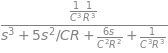

In [80]:
a1 = a.subs({'k': 1})
H1 = a1.transfer(1, 0, 4, 0)
H1

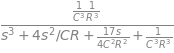

In [81]:
a2 = a.subs({'k': 1/2})
H2 = a2.transfer(1, 0, 4, 0)
H2

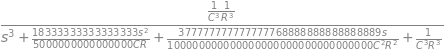

In [82]:
a3 = a.subs({'k': 1/3})
H3 = a3.transfer(1, 0, 4, 0)
H3

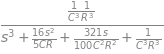

In [83]:
a10 = a.subs({'k': 1/10})
H10 = a10.transfer(1, 0, 4, 0)
H10

ExprDict({-1.52540211444321 - 1.12e-17*j: 1, -1.05061719105612 + 2.38e-17*j: 1, -0.623980694500676 - 1.25e-17*j: 1})
ExprDict({-2.08447267986262 + 2.44e-17*j: 1, -1.17332312402093 - 5.36e-17*j: 1, -0.408870862783119 + 2.91e-17*j: 1})
ExprDict({-2.40680325132417 + 1.42e-17*j: 1, -1.26465829006442 - 3.16e-17*j: 1, -0.328538458611415 + 1.73e-17*j: 1})


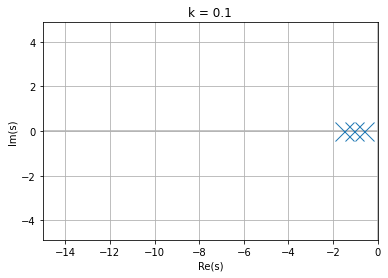

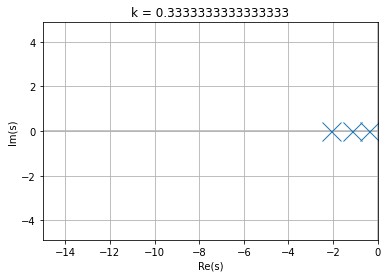

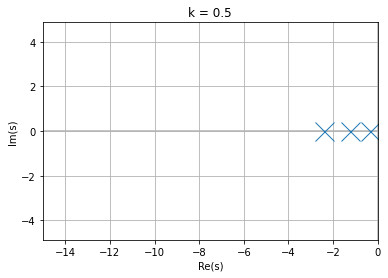

In [128]:
a_norm = a.subs({'R': 1, 'C': 1})
for k in [1/10, 1/3, 1/2]:
  a_norm_k = a_norm.subs({'k': k})
  H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
  print(H_norm_k.poles().evalf())
  ax = H_norm_k.plot()
  ax.set_title('k = ' + str(k))
  ax.set_xlim(-15, 0)

<AxesSubplot:xlabel='Frequency (Hz)', ylabel='Transfer function real part'>

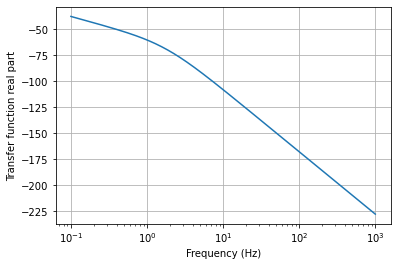

In [85]:
from numpy import logspace
from lcapy import s, j, pi, f, transfer

fv = logspace(-1, 3, 400)
H_norm_k(f).dB.plot(fv, log_scale=True)

resistances:  0.234375 0.0234375 0.00234375
capacitances:  200.0 20.000000000000004 2.0000000000000004
resistances:  0.234375 0.046875 0.009375
capacitances:  200.0 40.00000000000001 8.000000000000002
resistances:  0.234375 0.07812499999999999 0.02604166666666666
capacitances:  200.0 66.66666666666667 22.22222222222222
resistances:  0.234375 0.1171875 0.05859375
capacitances:  200.0 100.0 50.0


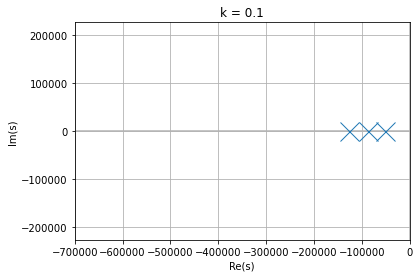

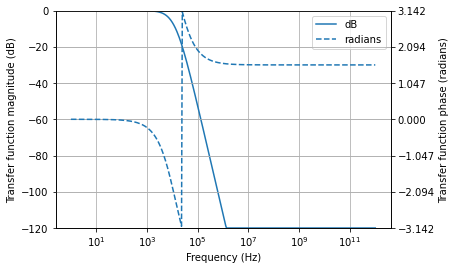

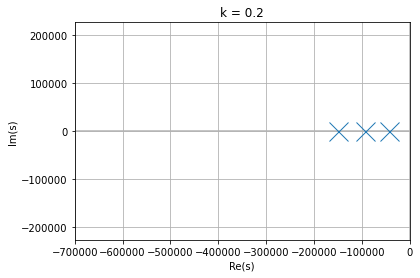

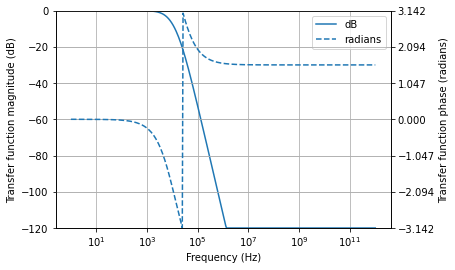

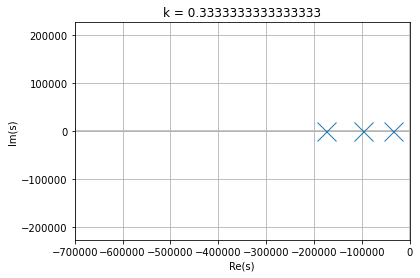

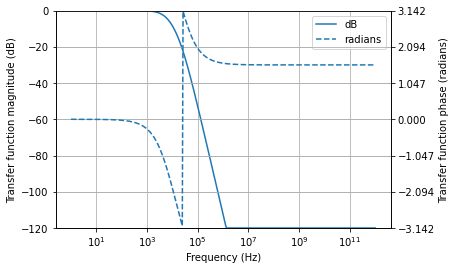

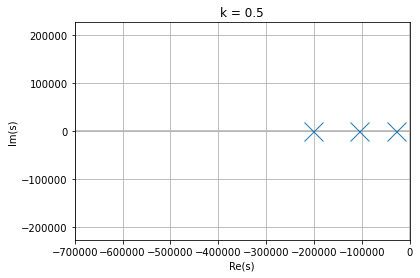

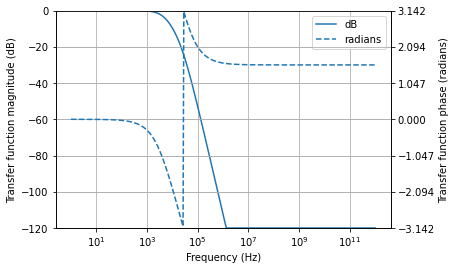

In [86]:
import math

##Simulate for fc = 3000Hz, setting C = 2fF

fc = 3000
fm = 2.56e6
q = 6
oversample = 64
capb = 200e-15 ## 200fF

res = 1/(2*math.pi*cs*fm)

a_norm = a.subs({'R': res, 'C': capb})
for k in [1/10, 1/5, 1/3, 1/2]:
    a_norm_k = a_norm.subs({'k': k})
    H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
    # H_norm_k.subplot(1, 2, 1)
    # print(list(H_norm_k.poles().evalf()))
    print("resistances: ", (fc/fm)*capb*1e15, (fc/fm)*capb*k*1e15, (fc/fm)*capb*k*k*1e15)
    print("capacitances: ", capb*1e15, capb*k*1e15, capb*k*k*1e15)
    ax = H_norm_k.plot()
    ax.set_title('k = ' + str(k))
    H_norm_k.bode_plot((1, 1000000000000))
    # fv = logspace(-1, 3, 400)
    # H_norm_k(f).dB.plot(fv, log_scale=True)
    ax.set_xlim(-7e5, 0) 

2.045307717180855e-14
all small capacitances:  20.45307717180855 4.09061543436171 0.818123086872342
all big capacitances:  10000.0 2000.0 400.0
all small capacitances:  20.45307717180855 5.113269292952137 1.2783173232380343
all big capacitances:  10000.0 2500.0 625.0
all small capacitances:  20.45307717180855 6.817692390602849 2.2725641302009496
all big capacitances:  10000.0 3333.333333333333 1111.111111111111
all small capacitances:  20.45307717180855 10.226538585904274 5.113269292952137
all big capacitances:  10000.0 5000.0 2500.0


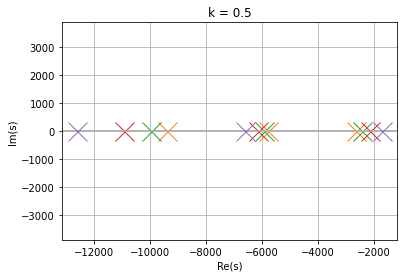

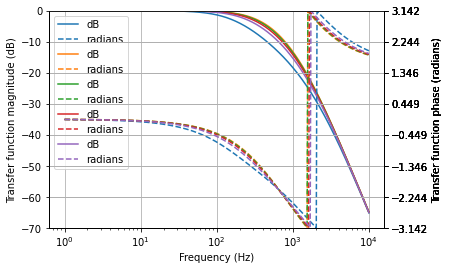

In [129]:
import math

##Simulate for fc = 3000Hz, setting Cmin = 2fF
from matplotlib.pyplot import savefig
fm = 2.56e6
q = 12
oversample = 256
fc = fm/(q*oversample)
capb = 10000e-15 ## 10pF

res = 1/(2*math.pi*capb*fc)
cs = capb*(fc/fm)*2*math.pi
print(cs)

a_norm = a.subs({'R': res, 'C': capb})

k = 1
ax = H_norm_k.plot()
a_norm_k = a_norm.subs({'k': k})
H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
ax.set_xlim(-1000, 0)
ax2 = H_norm_k.bode_plot((1, 10000))

for k in [1/5, 1/4, 1/3, 1/2]:
    a_norm_k = a_norm.subs({'k': k})
    H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
    print("all small capacitances: ", cs*1e15, cs*k*1e15, cs*k*k*1e15)
    print("all big capacitances: ", capb*1e15, capb*k*1e15, capb*k*k*1e15)
    H_norm_k.plot(axes=ax)
    ax.set_title('k = ' + str(k))
    H_norm_k.bode_plot((1, 10000), axes=ax2)

savefig("caps.png")
# labels = ["k=1", "k=1/4"]
# ax.legend(labels)

8.333333333333334e-13


AttributeError: 'LaplaceDomainTransfer' object has no attribute 'db'

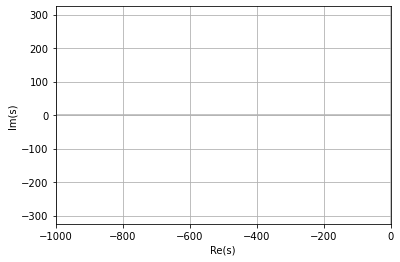

In [131]:
capb = 10000e-15 ## 200fF
fm = 10000
res = 1/(2*math.pi*capb*fc)
cs = capb*(fc/fm)
print(cs)

a_norm = a.subs({'R': res, 'C': capb})

k = 1
ax = H_norm_k.plot()
a_norm_k = a_norm.subs({'k': k})
H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
ax.set_xlim(-1000, 0)
ax2 = H_norm_k.bode_plot((1, 10000))

for k in [1/4]:
    a_norm_k = a_norm.subs({'k': k})
    H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
    print("all small capacitances: ", cs*1e15, cs*k*1e15, cs*k*k*1e15)
    print("all big capacitances: ", capb*1e15, capb*k*1e15, capb*k*k*1e15)
    H_norm_k.plot(axes=ax)
    ax.set_title('k = ' + str(k))
    H_norm_k.bode_plot((1, 10000), axes=ax2)

labels = ["k=1", "k=1/4"]
ax.legend(labels)

(s - 2)*(s + 3)/(s*(s - 2*j)*(s + 2*j))


<AxesSubplot:xlabel='Frequency (Hz)', ylabel='Transfer function real part'>

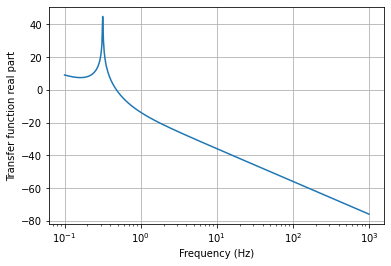

In [119]:
from lcapy import s, j, pi, f, transfer
from numpy import logspace

H = transfer((s - 2) * (s + 3) / (s * (s - 2 * j) * (s + 2 * j)))
print(H)
fv = logspace(-1, 3, 400)
H(f).dB.plot(fv, log_scale=True)

In [130]:
1/(2*math.pi*1e11*12400)

C:\Users\ankur\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\ankur\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\ankur\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\ankur\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [153]:
def tf_rc(order=3):
    
    circuit = """
    .param k=3
    P1 1 0; v=v_i(t)\n"""
    
    for i in range(order):
        kd ="/k"*i
        km = "*k"*i
        circuit+="""R""" + str(i+1) + """ """+ str(i+1) + """ """+ str(i+2) + """ {R""" + km+ """};\n"""
        circuit+="""C""" + str(i+1) + """ """+ str(i+2) + """ """+ str(0) + """ {R""" + kd+ """};\n"""
        
    circuit += """P2 4 0; v^=v_o(t)"""
    return Circuit(circuit)
    
a3 = tf_rc(3)
print(a3)

.param k=3
P1 1 0; v=v_i(t)
R1 1 2 {R};
C1 2 0 {R};
R2 2 3 {R*k};
C2 3 0 {R/k};
R3 3 4 {R*k*k};
C3 4 0 {R/k/k};
P2 4 0; v^=v_o(t)


In [154]:
Hfull = a3.transfer(1, 0, 4, 0)
Hfull

AttributeError: Unknown element or node name sub